In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('fulfilment_center_info.csv')
df1 = pd.read_csv('meal_info.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('train.csv')

In [2]:
## Making Copies of the files
fill = df.copy()
meal = df1.copy()
test = df2.copy()
train = df3.copy()

The goal of this project will be to look at the data set for a meal delivery service and analyze the data to determine. The purpose of picking this project was to bolster join skills.

New Learned Methods
.unstack()

Issues:
Desert spelt wrong

In [3]:
fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


Questions that come to mind, does the operational area determine the number of sales
is it certain areas that are sending more promo than others
which meals are the most popular
which centers have the highest amount of distribution in price
base price vs checkout price
put center id city code region code center type op area into seperate histograms
center id vs check out price, base price, promo, homepage
drop center type
see which centers sell more of which cuisine


In [4]:
fill.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


# MEAL

In [5]:
print(meal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [6]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
meal.groupby(['category','cuisine'])['meal_id'].count().unstack()

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,3.0,3.0,3.0,3.0
Biryani,NaN,3.0,NaN,NaN
Desert,NaN,3.0,NaN,NaN
Extras,NaN,NaN,NaN,3.0
Fish,3.0,NaN,NaN,NaN
Other Snacks,NaN,NaN,NaN,3.0
Pasta,NaN,NaN,3.0,NaN
Pizza,3.0,NaN,NaN,NaN
Rice Bowl,NaN,3.0,NaN,NaN


This shows us the number of meal ids for each cusine

# TEST

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [9]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [10]:
test[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']].describe() #remove count from top row and id and week and cneter id and meal id


,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,32573.000000,32573.000000,32573.000000,32573.000000
mean,341.854440,356.493615,0.066435,0.081356
std,153.893886,155.150101,0.249045,0.273385
min,67.900000,89.240000,0.000000,0.000000
25%,214.430000,243.500000,0.000000,0.000000
50%,320.130000,321.130000,0.000000,0.000000
75%,446.230000,455.930000,0.000000,0.000000
max,1113.620000,1112.620000,1.000000,1.000000


In [11]:
full = fill.merge(test, left_on = 'center_id', right_on = 'center_id' )
full = full.merge(meal, left_on = 'meal_id', right_on = 'meal_id')
full.head()

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,11,679,56,TYPE_A,3.7,1098228,146,1885,158.17,157.17,0,0,Beverages,Thai
1,11,679,56,TYPE_A,3.7,1080847,147,1885,158.14,158.14,0,0,Beverages,Thai
2,11,679,56,TYPE_A,3.7,1064602,148,1885,157.17,158.17,0,0,Beverages,Thai
3,11,679,56,TYPE_A,3.7,1093227,149,1885,157.17,158.17,0,0,Beverages,Thai
4,11,679,56,TYPE_A,3.7,1177861,150,1885,159.14,158.14,0,0,Beverages,Thai


In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
center_id                32573 non-null int64
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
id                       32573 non-null int64
week                     32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
category                 32573 non-null object
cuisine                  32573 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ MB


univariables

# UNIVARIABLE


# TEST

In [27]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


## ID
We know that there are 32573 orders. There really is not anything else to learn from this variable.

## WEEK

In [14]:
test.groupby('week').size()

week
146    3240
147    3271
148    3332
149    3313
150    3277
151    3224
152    3242
153    3268
154    3228
155    3178
dtype: int64

## CENTER ID

In [31]:
test.groupby('center_id').size().sort_values(ascending=False).mean() #Avergae count for each center

423.02597402597405

## Checkout Price

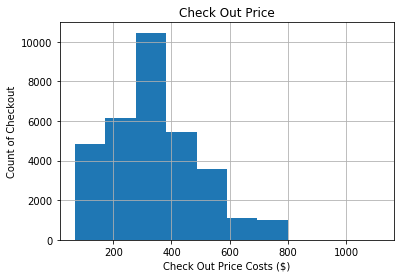

In [74]:
ax = test.hist(column='checkout_price')

ax=ax[0]
for x in ax:
    
    x.set_title('Check Out Price')
    x.set_xlabel('Check Out Price Costs ($)')
    x.set_ylabel('Count of Checkout')

In [75]:
test[['checkout_price']].head()

,checkout_price
0,158.11
1,160.11
2,157.14
3,162.02
4,163.93


## Emailer for Promotion

In [80]:
test.groupby('emailer_for_promotion').size()

emailer_for_promotion
0    30409
1     2164
dtype: int64

In [81]:
test.groupby('homepage_featured').size()

homepage_featured
0    29923
1     2650
dtype: int64

In [16]:
test.groupby(['week', 'emailer_for_promotion'])['checkout_price'].size().unstack()

emailer_for_promotion,0,1
week,,
146,3177,63
147,3117,154
148,3110,222
149,2940,373
150,2815,462
151,2800,424
152,3088,154
153,3110,158
154,3151,77


In [17]:
test.sort_values(by='emailer_for_promotion', ascending=False).head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
16286,1287135,150,86,1962,535.50,562.60,1,1
22787,1386804,152,68,1754,195.00,282.27,1,1
10057,1072966,149,32,2304,372.54,434.56,1,1
22958,1062654,153,24,1971,194.97,340.53,1,0
22957,1100299,153,24,1754,195.97,320.16,1,0


In [18]:
promo = test[test['emailer_for_promotion']== 1]
no_promo = test[test['emailer_for_promotion'] == 0]

In [19]:
p_describe = promo[['checkout_price']].describe().set_index('checkout_price')

## On average, promo customers spent about $17 more

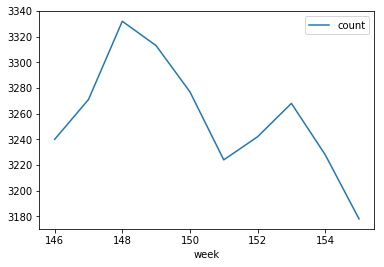

In [20]:
week_counts = test.groupby('week')[['id']].count().reset_index().rename(columns = {'id':'count'})
week_counts.plot.line(x='week', y='count');

In [21]:
week_means = test.groupby('week')[['checkout_price']].mean().reset_index().rename(columns = {'checkout_price':'checkout_price_mean'})
week_means

,week,checkout_price_mean
0,146,347.142114
1,147,342.397019
2,148,338.313004
3,149,334.949073
4,150,335.818599
5,151,336.104702
6,152,339.202807
7,153,345.647338
8,154,349.009545
9,155,350.410771


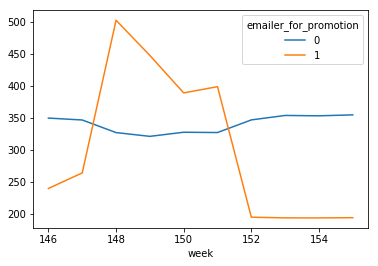

In [22]:
test.groupby(['week', 'emailer_for_promotion'])['checkout_price'].aggregate('mean').unstack().plot()

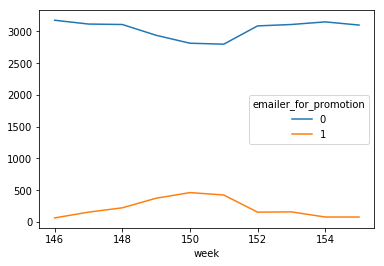

In [23]:
test.groupby(['week', 'emailer_for_promotion'])['checkout_price'].size().unstack().plot()

In [24]:
test.groupby(['week', 'emailer_for_promotion'])['checkout_price'].size().unstack()

emailer_for_promotion,0,1
week,,
146,3177,63
147,3117,154
148,3110,222
149,2940,373
150,2815,462
151,2800,424
152,3088,154
153,3110,158
154,3151,77


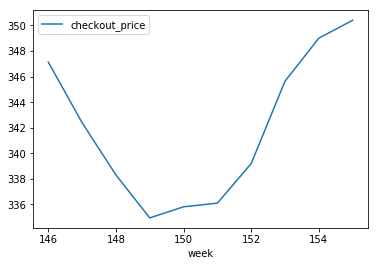

In [25]:
test.groupby(['week'])[['checkout_price']].mean().plot()

In [26]:
plt.figure(figsize=[14,7])
plt.subplot(1,1,1)
sb.plot(data = 'test', x =)

SyntaxError: invalid syntax (<ipython-input-26-732fe3729a82>, line 3)

In [ ]:
plt.figure(figsize=[14,7])
plt.subplot(1,1,1)
test.groupby('meal_id')[['checkout_price']].mean().plot(kind = 'bar')

Top meal ids and their total checkout price

Calculate the difference between checkout vs base price
Calculate which weeks centers to the best (line graph?)
See if there is an increase in the number of sales for emailer promotion and homepage feature